In [95]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
import os
import random 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

#load datasets for train, val, test.
train_data = image_dataset_from_directory(
 "/kaggle/input/100-bird-species/train",
    image_size=(224, 224),
    shuffle=True,
    batch_size=24)
test_data = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/test",
    image_size=(224, 224),
    shuffle=True,
    batch_size=24)
validation_data = image_dataset_from_directory(
   "/kaggle/input/100-bird-species/valid",
    image_size=(224, 224),
    shuffle=True,
    batch_size=24)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


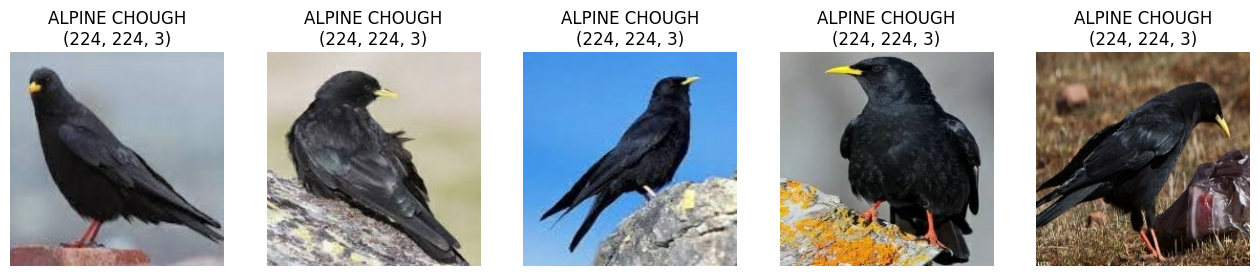

In [96]:
# prints out images from dataset
def plot_5images(target_dir):
    
    target_class=random.choice(os.listdir(target_dir))
    target_folder=os.path.join(target_dir,target_class)
    random_image=random.sample(os.listdir(target_folder),5)
 
    plt.figure(figsize=(16,5))
    for i in range(5):
        
        plt.subplot(1,5,i+1)
        img=tf.io.read_file(os.path.join(target_folder,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'{target_class}\n{img.shape}')
        plt.axis(False)
        
plot_5images("/kaggle/input/100-bird-species/train")

#one hot encoding needed to use normal crossentropy vs sparse
def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=525)
    return image, label

train_data = train_data.map(one_hot_encode)
validation_data = validation_data.map(one_hot_encode)

In [97]:
#augment data for model 
data_augmentation = keras.Sequential(
    [
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.1),
        layers.RandomFlip('horizontal'),
        layers.Rescaling(1./255)
    ]
)

In [98]:
#cnn model 
inputs = keras.Input(shape=(224, 224, 3))
Model_= data_augmentation(inputs)

Model_= layers.Conv2D(filters=16, kernel_size=5, padding='same', activation='relu')(Model_)
Model_= layers.BatchNormalization()(Model_)
Model_= layers.MaxPooling2D(pool_size=2)(Model_)

Model_= layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(Model_)
Model_= layers.BatchNormalization()(Model_)
Model_= layers.MaxPooling2D(pool_size=2)(Model_)

Model_= layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(Model_)
Model_= layers.BatchNormalization()(Model_)
Model_= layers.MaxPooling2D(pool_size=2)(Model_)

Model_= layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(Model_)
Model_= layers.BatchNormalization()(Model_)
Model_= layers.GlobalAveragePooling2D()(Model_)

Model_= layers.Dropout(0.5)(Model_)
outputs = layers.Dense(525, activation="softmax")(Model_)
sequential_model = keras.Model(inputs=inputs, outputs=outputs)
sequential_model.summary()

Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_9 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 224, 224, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_9      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 525)            │        67,725 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,893 (651.93 KB)

 Trainable params: 166,413 (650.05 KB)

 Non-trainable params: 480 (1.88 KB)

In [99]:
import tensorflow as tf

sequential_model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [100]:
sequential_history = sequential_model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
   )

Epoch 1/2
3527/3527 ━━━━━━━━━━━━━━━━━━━━ 172s 48ms/step - accuracy: 0.0211 - loss: 5.7805 - val_accuracy: 0.0655 - val_loss: 5.1538
Epoch 2/2
3527/3527 ━━━━━━━━━━━━━━━━━━━━ 168s 48ms/step - accuracy: 0.0959 - loss: 4.6948 - val_accuracy: 0.1836 - val_loss: 4.2520


In [101]:
test_data = test_data.map(one_hot_encode)
test_loss, test_acc = sequential_model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.3f}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1698 - loss: 4.1290
Test accuracy: 0.182


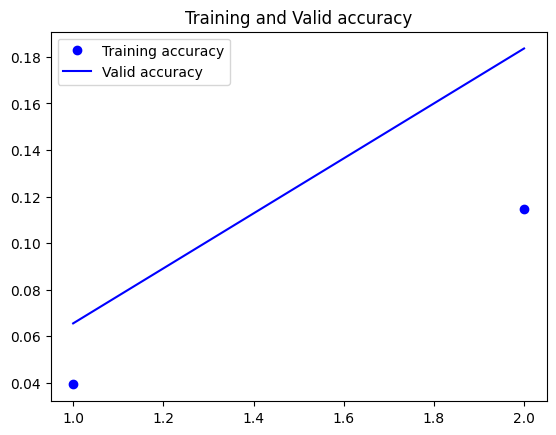

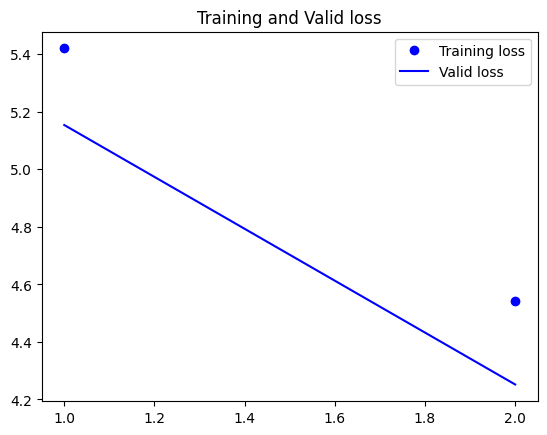

In [102]:

#Print out graph containing accuracy and loss data 
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo")
plt.plot(epochs, val_accuracy, "b")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Valid accuracy")
plt.legend(["Training accuracy", "Valid accuracy"])
plt.figure()
plt.plot(epochs, loss, "bo")
plt.plot(epochs, val_loss, "b")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Valid loss")
plt.legend(["Training loss", "Valid loss"])
plt.show()

In [ ]:

#code to check if leaky relu was needed. checks for dead relus
def get_activations(model, data, layer_index):
    # Create a Model to fetch outputs from the specified layer
    layer_output = model.layers[layer_index].output
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)
    
    # Use the new model to predict, this will give you the outputs of the specified layer
    activations = activation_model.predict(data)
    return activations

def check_zero_activations(model, data, layer_index):
    # Get activations for the specified layer
    activations = get_activations(model, data, layer_index)
    
    # Calculate the proportion of zero values in the activations 
    zero_count = np.sum(activations == 0)
    total_count = np.prod(activations.shape)
    print(f"Zero activations: {zero_count/total_count:.2%}")

    
check_zero_activations(sequential_model, test_data, 0)  
check_zero_activations(sequential_model, test_data, 1)  
check_zero_activations(sequential_model, test_data, 2)  